In [2]:
pip install opendatasets

In [4]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/shwetabh123/mall-customers")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ahsanatiq98
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/shwetabh123/mall-customers


100%|██████████| 1.56k/1.56k [00:00<00:00, 3.80MB/s]

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


In [7]:
df = pd.read_csv('/content/mall-customers/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.drop(columns = 'CustomerID', inplace = True)

In [10]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [15]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,1.400000
std,13.969007,26.264721,25.823522,1.449311
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,1.000000
75%,49.000000,78.000000,73.000000,3.000000
max,70.000000,137.000000,99.000000,4.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
 4   Cluster                 200 non-null    int32 
dtypes: int32(1), int64(3), object(1)
memory usage: 7.2+ KB


In [17]:
df.isna().sum()

,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0
Cluster,0


In [19]:
df.duplicated().sum()

np.int64(0)

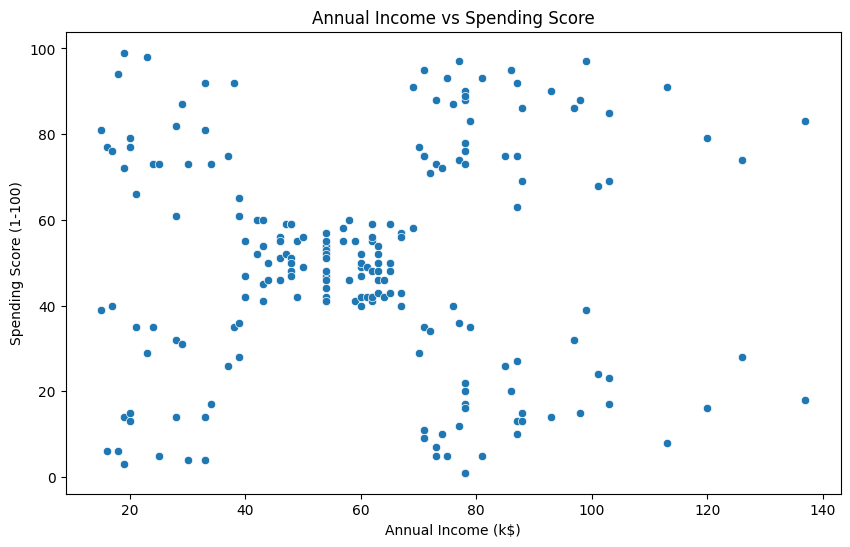

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [12]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [13]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

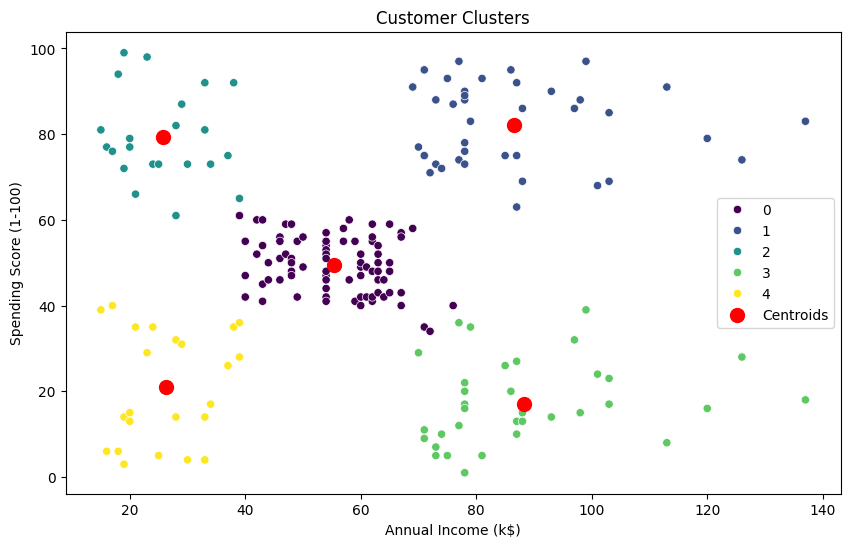

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('Customer Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()